<a href="https://colab.research.google.com/github/2303A51531/E-AI-Lab/blob/main/xai_lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#COMPLETE MACHINE LEARNING + DEEP LEARNING PIPELINE

In [62]:
 #Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [9]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
import shap

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
import warnings
warnings.filterwarnings("ignore")


In [63]:
#STEP 2: Load Dataset
df = pd.read_csv("Cleaned-Data.csv")
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (173, 36)
            Age  Weight_kg  Height_ft Marital_Status PCOS Family_History_PCOS  \
0         20-25       66.0     157.48      Unmarried   No                  No   
1  Less than 20       56.0     165.10      Unmarried   No                  No   
2  Less than 20       89.0     167.64      Unmarried   No                 Yes   
3         20-25       55.0     160.02      Unmarried   No                 Yes   
4  Less than 20       55.0     160.02      Unmarried   No                  No   

  Menstrual_Irregularity Hormonal_Imbalance Hyperandrogenism Hirsutism  ...  \
0                    Yes                 No               No        No  ...   
1                     No                 No               No        No  ...   
2                     No                 No               No       Yes  ...   
3                     No                Yes               No       Yes  ...   
4                     No                 No               No        No  ...   

  Diet_Multiv

In [18]:
# PREPROCESSING SECTION
# 1. Handle Missing Values (Safe for Mixed Data)
from sklearn.impute import SimpleImputer

print("\nMissing Values Before:\n", df.isnull().sum())

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# Impute categorical columns with mode (most frequent value)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("\nMissing Values After:\n", df.isnull().sum())



Missing Values Before:
 Age                           0
Weight_kg                     0
Height_ft                     0
Marital_Status                0
PCOS                          0
Family_History_PCOS           0
Menstrual_Irregularity        0
Hormonal_Imbalance            0
Hyperandrogenism              0
Hirsutism                     0
Mental_Health                 0
Conception_Difficulty         0
Insulin_Resistance            0
Diabetes                      0
Childhood_Trauma              0
Cardiovascular_Disease        0
Diet_Bread_Cereals            0
Diet_Milk_Products            0
Diet_Fruits                   0
Diet_Vegetables               0
Diet_Starchy_Vegetables       0
Diet_NonStarchy_Vegetables    0
Diet_Fats                     0
Diet_Sweets                   0
Diet_Fried_Food               0
Diet_Tea_Coffee               0
Diet_Multivitamin             0
Vegetarian                    0
Exercise_Frequency            0
Exercise_Type                 0
Exercise_Durati

In [15]:
# 2. Normalization
scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

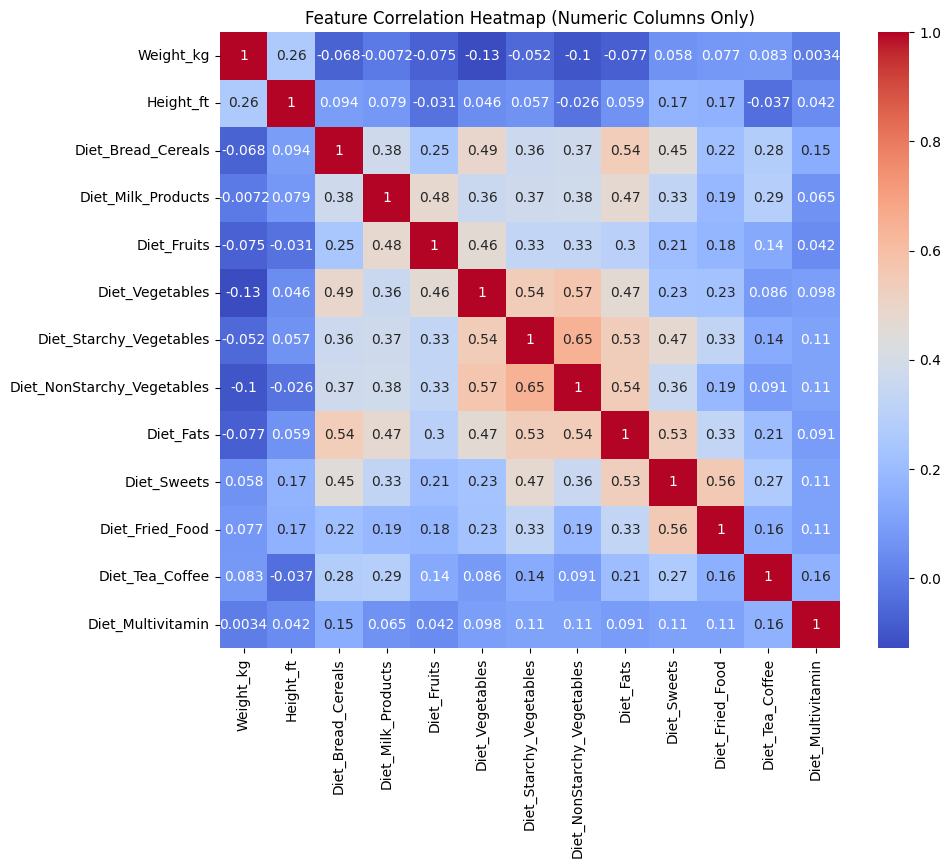

In [17]:
# 3. Correlation Analysis (Safe Version)
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [20]:
# 4. Handle Imbalance
target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]

df_bal = pd.concat([X, y], axis=1)
majority = df_bal[df_bal[target] == df_bal[target].mode()[0]]
minority = df_bal[df_bal[target] != df_bal[target].mode()[0]]
minority_up = resample(minority, replace=True, n_samples=len(majority), random_state=42)
df_balanced = pd.concat([majority, minority_up])

X = df_balanced.drop(target, axis=1)
y = df_balanced[target]
print("\nBalanced Class Distribution:\n", y.value_counts())


Balanced Class Distribution:
 PCOS_Medication
No.                                                                                                                                                                                                                                     165
Yes, hormonal therapy (e.g., birth control pills)                                                                                                                                                                                        28
Herbal                                                                                                                                                                                                                                   23
Glucophage                                                                                                                                                                                                                               22
Option 2 

In [21]:
# 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# FEATURE SELECTION - SHAP
from sklearn.preprocessing import LabelEncoder

# Copy dataset to avoid overwriting original
df_encoded = df.copy()

# Convert all categorical columns to numeric using Label Encoding
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

print(" All categorical columns converted to numeric.")


 All categorical columns converted to numeric.


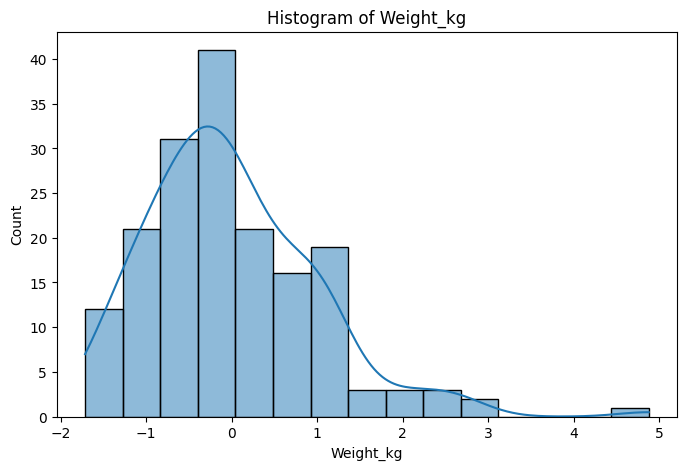

In [26]:
# VISUALIZATION SECTION
# 1. Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df[num_cols[0]], kde=True)
plt.title(f"Histogram of {num_cols[0]}")
plt.show()

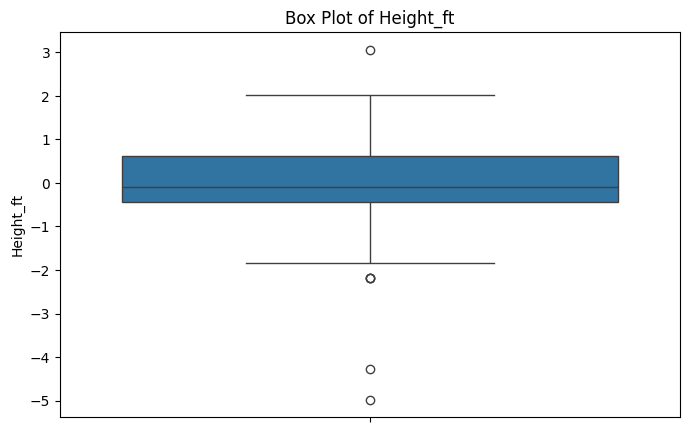

In [28]:
#Box Plot
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['number']).columns  # numeric columns
plt.figure(figsize=(8, 5))
sns.boxplot(y=df[num_cols[1]])  # simple numeric column plot
plt.title(f"Box Plot of {num_cols[1]}")
plt.show()



Duplicate columns: Index([], dtype='object')
✅ Duplicate columns removed!
Numeric columns: Index(['Weight_kg', 'Height_ft', 'Diet_Bread_Cereals', 'Diet_Milk_Products',
       'Diet_Fruits', 'Diet_Vegetables', 'Diet_Starchy_Vegetables',
       'Diet_NonStarchy_Vegetables', 'Diet_Fats', 'Diet_Sweets',
       'Diet_Fried_Food', 'Diet_Tea_Coffee', 'Diet_Multivitamin'],
      dtype='object')


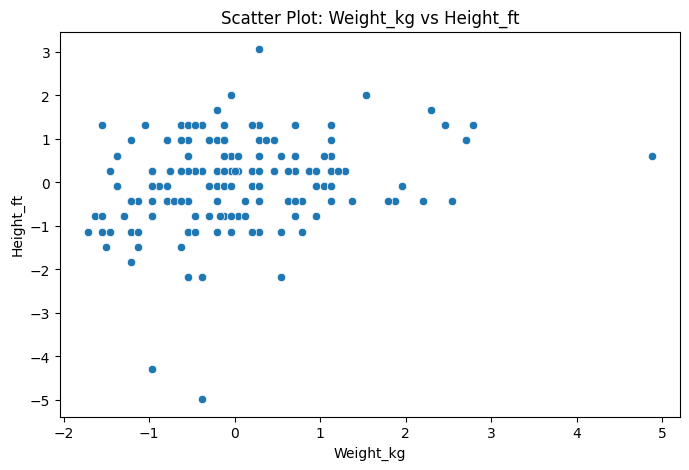

In [33]:
# 3. Scatter Plot
# Find duplicate columns
duplicates = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicates)
df = df.loc[:, ~df.columns.duplicated()]
print("✅ Duplicate columns removed!")

num_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:", num_cols)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]])
plt.title(f"Scatter Plot: {num_cols[0]} vs {num_cols[1]}")
plt.show()


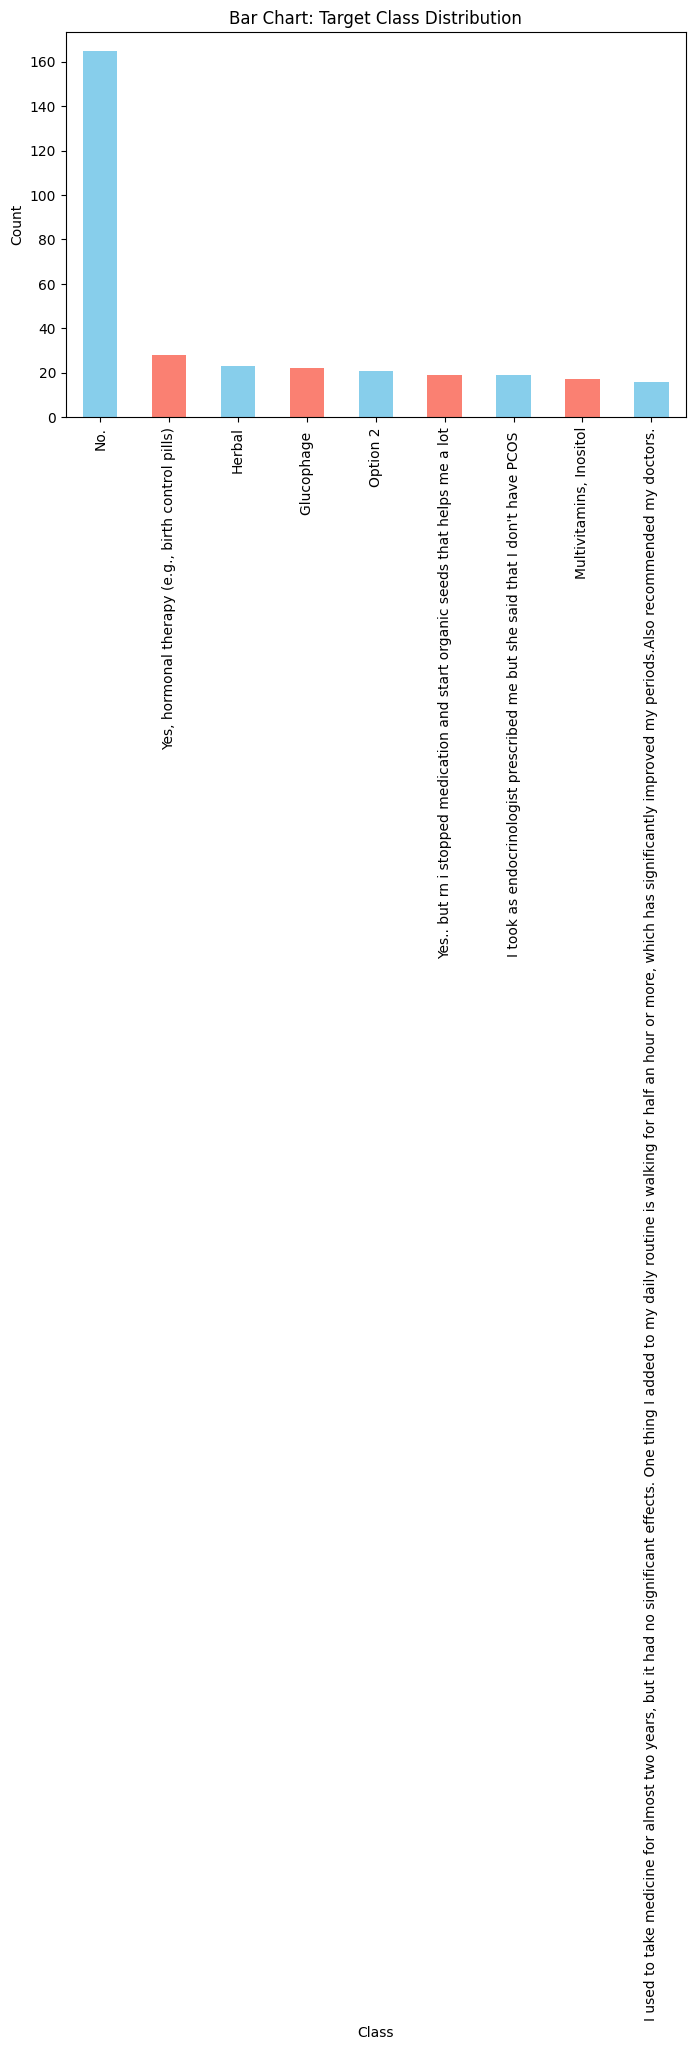

In [34]:
# 4. Bar Chart
plt.figure(figsize=(8,5))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Bar Chart: Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

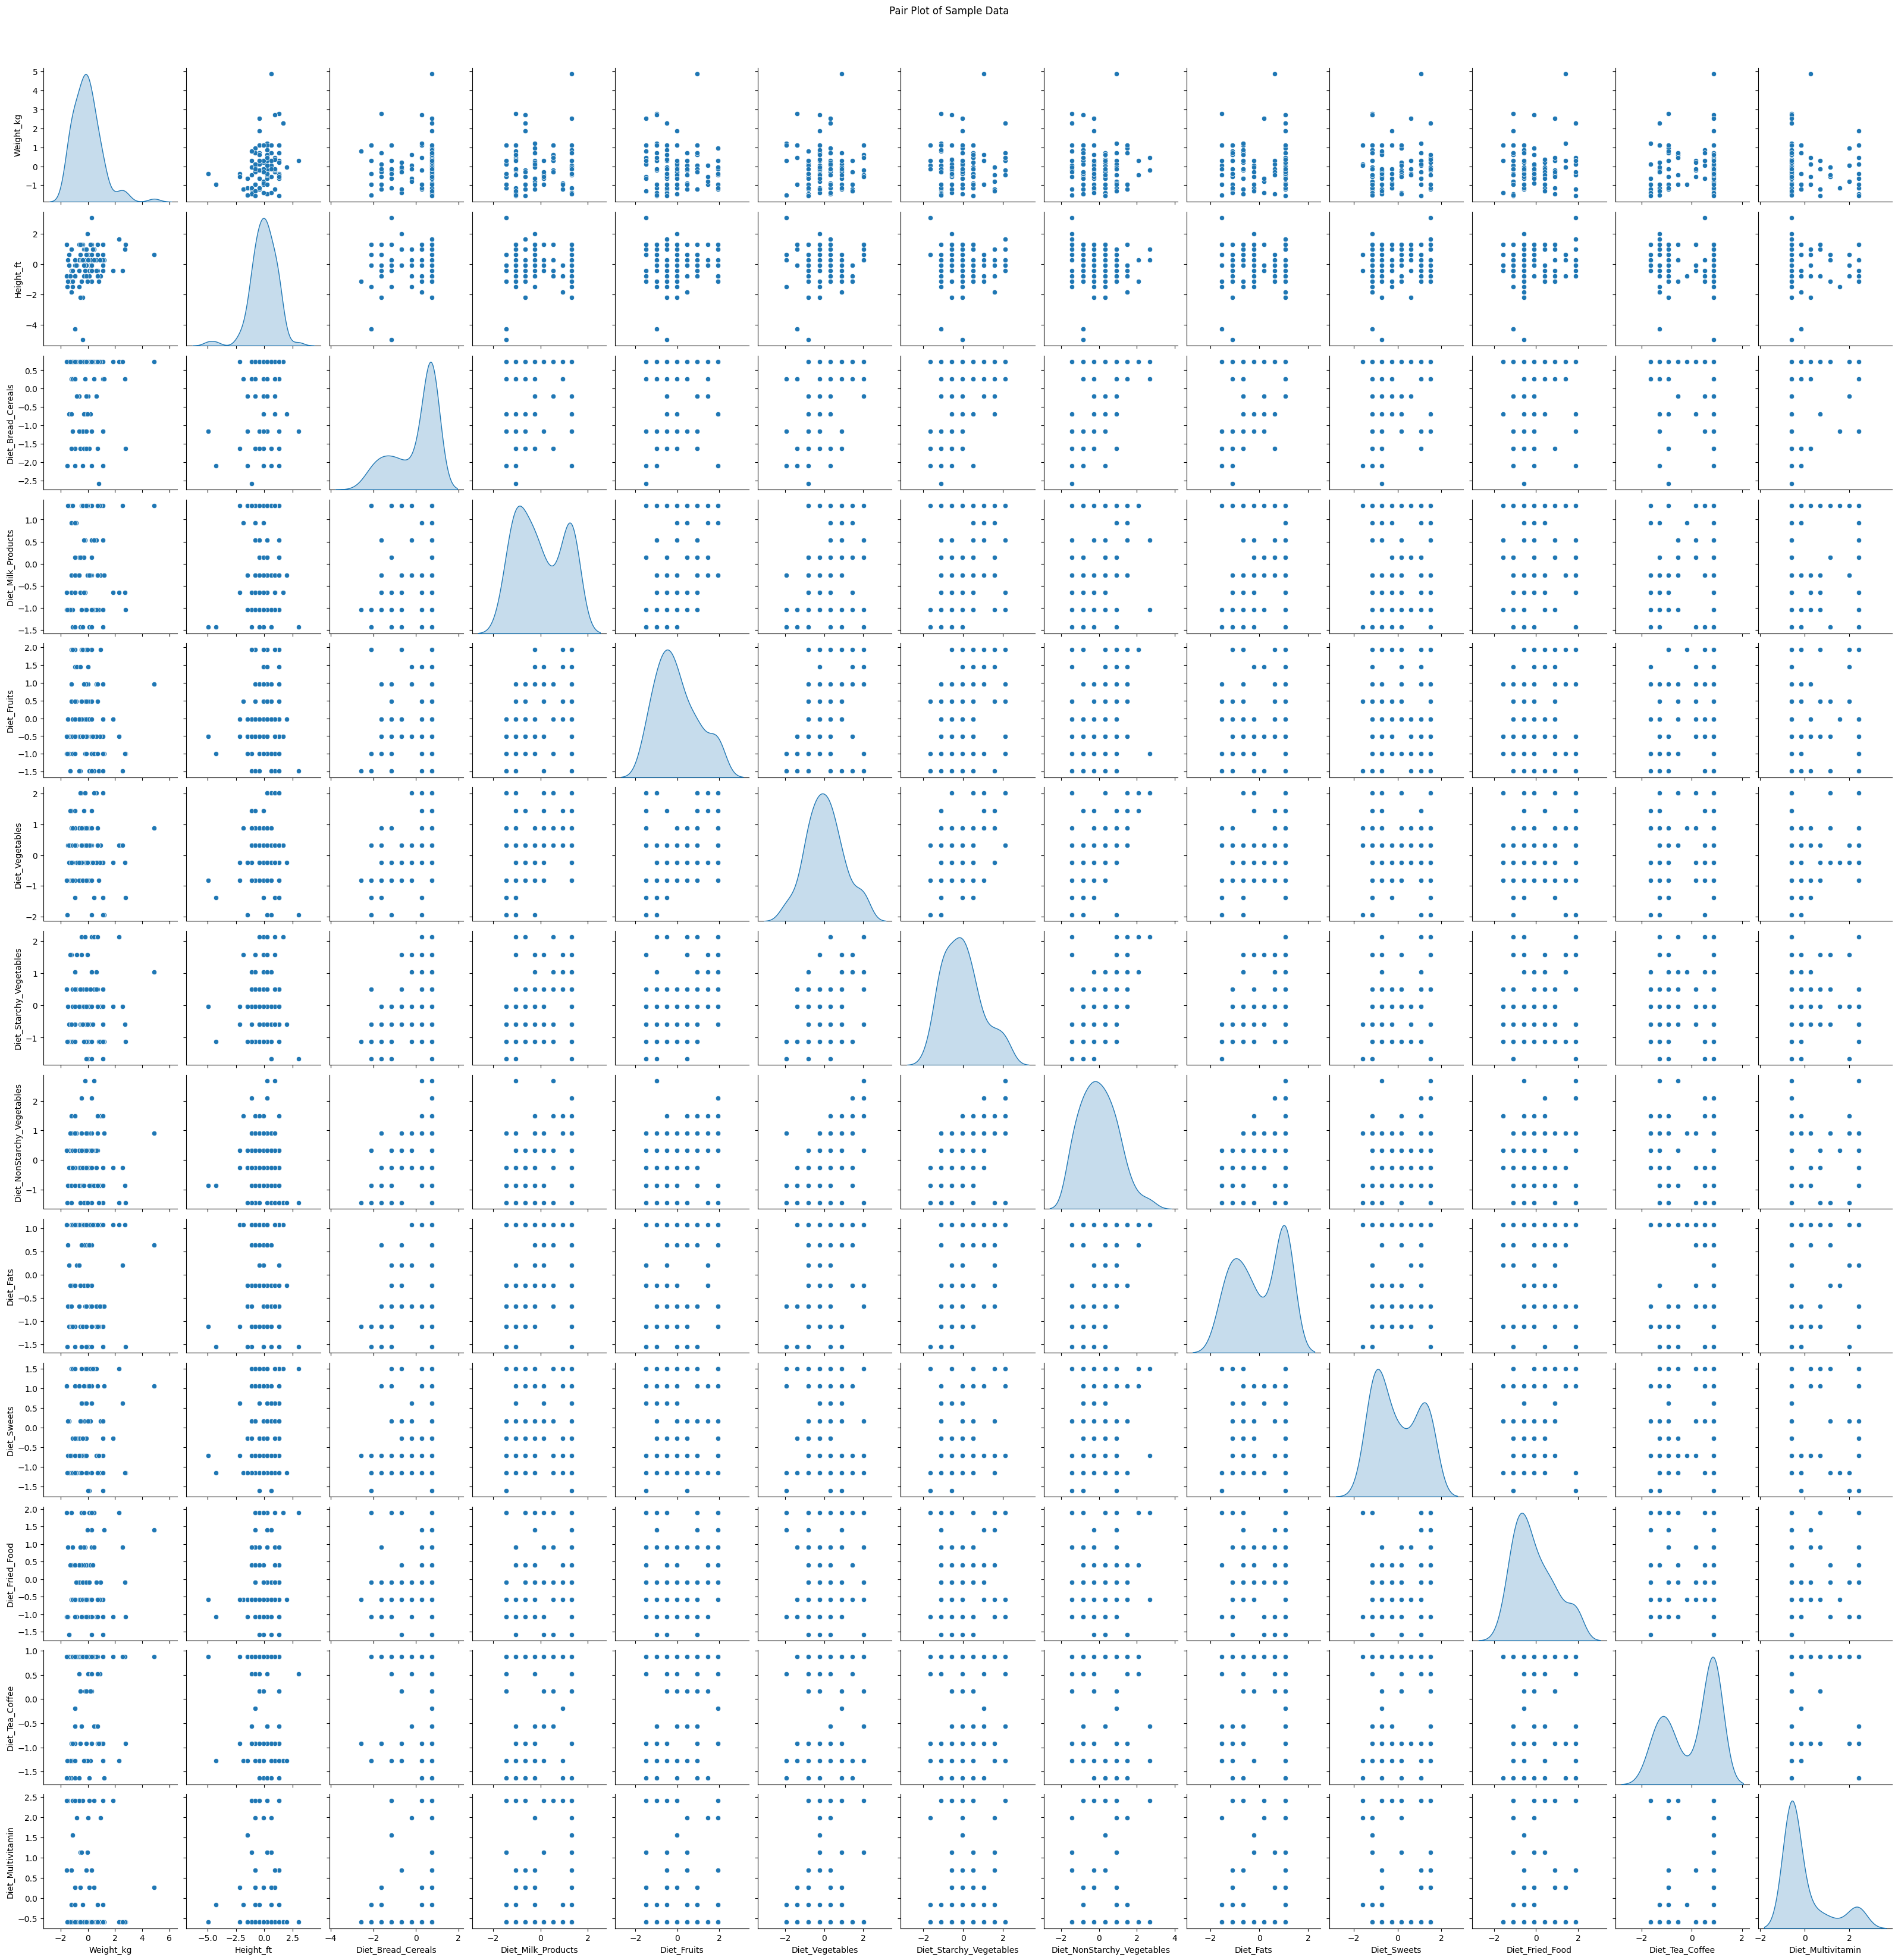

In [35]:
# 5. Pair Plot
sns.pairplot(df.sample(100), diag_kind='kde')
plt.suptitle("Pair Plot of Sample Data", y=1.02)
plt.show()


In [44]:
# MACHINE LEARNING MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True)
}

results = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Check if model supports predict_proba (for AUC)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_proba = None

    # Detect binary or multiclass
    if len(set(y_test)) > 2:
        avg = 'weighted'   # multiclass
    else:
        avg = 'binary'     # binary classification

    # Calculate scores
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average=avg, zero_division=0),
        "Recall": recall_score(y_test, y_pred, average=avg, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average=avg, zero_division=0),
        "AUC": None
    }

    # Compute AUC safely
    try:
        if y_proba is not None:
            if len(set(y_test)) > 2:
                metrics["AUC"] = roc_auc_score(y_test, y_proba, multi_class='ovr')
            else:
                metrics["AUC"] = roc_auc_score(y_test, y_proba[:, 1])
    except Exception as e:
        metrics["AUC"] = f"Error: {str(e)}"

    results.append(metrics)

# Create a summary DataFrame
ml_df = pd.DataFrame(results)
print("\n=== Machine Learning Model Results ===\n")
print(ml_df)



=== Machine Learning Model Results ===

                 Model  Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression  0.800000   0.796825  0.800000  0.796141   
1        Decision Tree  0.714286   0.762338  0.714286  0.726826   
2                  KNN  0.800000   0.740260  0.800000  0.751054   
3          Naive Bayes  0.771429   0.783883  0.771429  0.772910   
4                  SVM  0.828571   0.830252  0.828571  0.771560   

                                                 AUC  
0  Error: Number of classes in y_true not equal t...  
1  Error: Number of classes in y_true not equal t...  
2  Error: Number of classes in y_true not equal t...  
3  Error: Number of classes in y_true not equal t...  
4  Error: Number of classes in y_true not equal t...  


In [46]:
# ENSEMBLE MODELS
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# ============================================
# ENSEMBLE MODELS
# ============================================
ensemble_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42)
}

ensemble_results = []

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Safe probability prediction
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
    else:
        y_proba = None

    # Binary or multiclass detection
    avg = 'weighted' if len(set(y_test)) > 2 else 'binary'

    # Base metrics
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average=avg, zero_division=0),
        "Recall": recall_score(y_test, y_pred, average=avg, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average=avg, zero_division=0),
        "AUC": None
    }

    # Compute AUC safely
    try:
        if y_proba is not None:
            if len(set(y_test)) > 2:
                metrics["AUC"] = roc_auc_score(y_test, y_proba, multi_class='ovr')
            else:
                metrics["AUC"] = roc_auc_score(y_test, y_proba[:, 1])
    except Exception as e:
        metrics["AUC"] = f"Error: {str(e)}"

    ensemble_results.append(metrics)

# Convert results to DataFrame
ensemble_df = pd.DataFrame(ensemble_results)
print("\n=== Ensemble Model Results ===\n")
print(ensemble_df)



=== Ensemble Model Results ===

               Model  Accuracy  Precision    Recall  F1-Score  \
0      Random Forest  0.828571   0.789286  0.828571  0.796190   
1           AdaBoost  0.685714   0.694709  0.685714  0.688980   
2  Gradient Boosting  0.771429   0.735238  0.771429  0.751993   
3            Bagging  0.714286   0.706122  0.714286  0.709890   

                                                 AUC  
0  Error: Number of classes in y_true not equal t...  
1  Error: Number of classes in y_true not equal t...  
2  Error: Number of classes in y_true not equal t...  
3  Error: Number of classes in y_true not equal t...  


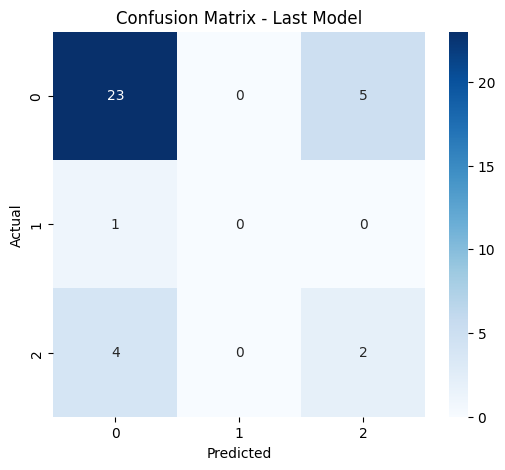

In [47]:
# CONFUSION MATRIX VISUALIZATION (Example)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Last Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

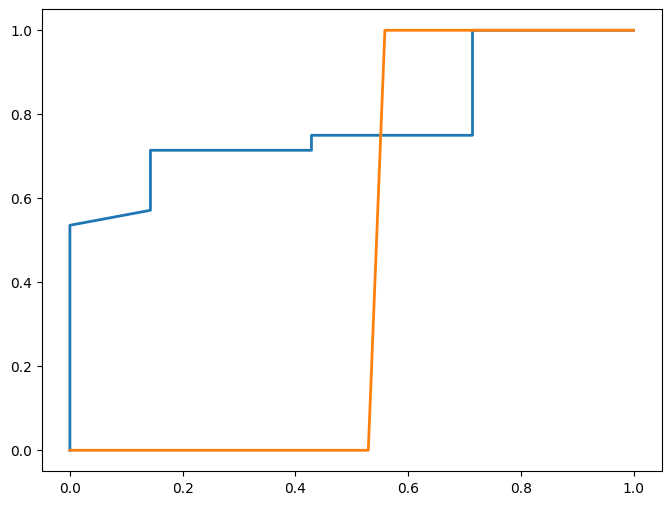

In [65]:
# AUC-ROC CURVE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
# Train your model (use the one you prefer)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities (if supported)
if hasattr(model, "predict_proba"):
    y_score = model.predict_proba(X_test)
else:
    # for models like SVM without predict_proba, use decision_function
    y_score = model.decision_function(X_test)

# Check number of unique classes
classes = np.unique(y_test)
n_classes = len(classes)

plt.figure(figsize=(8, 6))

if n_classes == 2:
    # 🟢 Binary classification
    if y_score.ndim > 1:
        y_score = y_score[:, 1]  # take positive class probability
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, color="darkorange", lw=2,
             label=f"ROC curve (AUC = {auc_score:.2f})")

else:
    # 🔵 Multiclass classification
    y_test_bin = label_binarize(y_test, classes=classes)
    if y_score.ndim == 1:  # some models return 1D scores
        y_score = np.expand_dims(y_score, axis=1)
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        auc_score = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label=f"Class {classes[i]} (AUC = {auc_score:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()



In [52]:
# DEEP LEARNING MODEL (Multilayer Perceptron)

model_dl = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_dl.fit(X_train, y_train, epochs=25, batch_size=16, validation_data=(X_test, y_test), verbose=0)


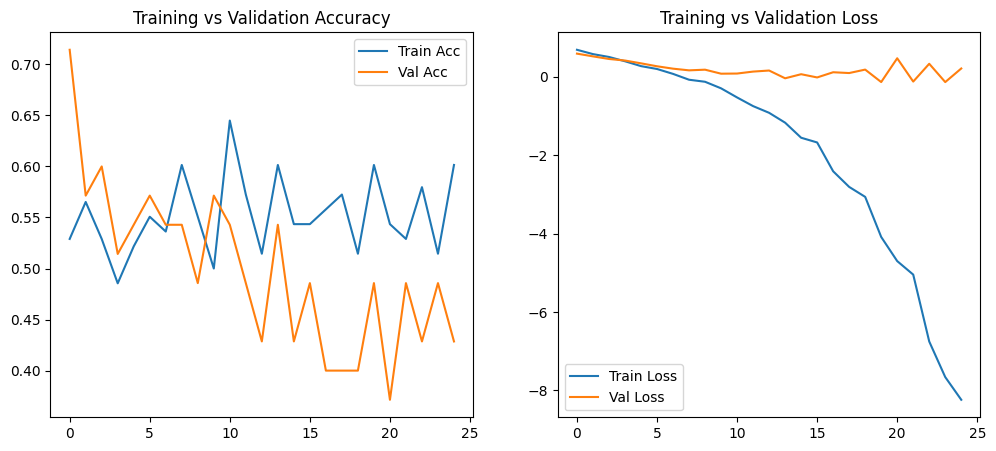

In [53]:
# Training / Validation Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [56]:

# Deep Learning Model Evaluation (Fixed)

# Get predictions (assuming sigmoid/softmax output)
y_pred_dl = model_dl.predict(X_test)

# If model outputs probabilities, convert to class labels
if y_pred_dl.ndim > 1 and y_pred_dl.shape[1] > 1:
    # Multiclass classification
    y_pred_dl = np.argmax(y_pred_dl, axis=1)
else:
    # Binary classification
    y_pred_dl = (y_pred_dl > 0.5).astype("int32").flatten()

# Now calculate metrics safely
print("\n=== Deep Learning Model Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dl))

# Detect multiclass or binary automatically
if len(np.unique(y_test)) > 2:
    avg_type = 'weighted'   # multiclass
else:
    avg_type = 'binary'     # binary

print("Precision:", precision_score(y_test, y_pred_dl, average=avg_type))
print("Recall:", recall_score(y_test, y_pred_dl, average=avg_type))
print("F1-Score:", f1_score(y_test, y_pred_dl, average=avg_type))



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

=== Deep Learning Model Metrics ===
Accuracy: 0.42857142857142855
Precision: 0.75
Recall: 0.42857142857142855
F1-Score: 0.5454545454545454
